In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.interpolate import splprep, splev

# UMAP, T-sne, PCA with points

/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


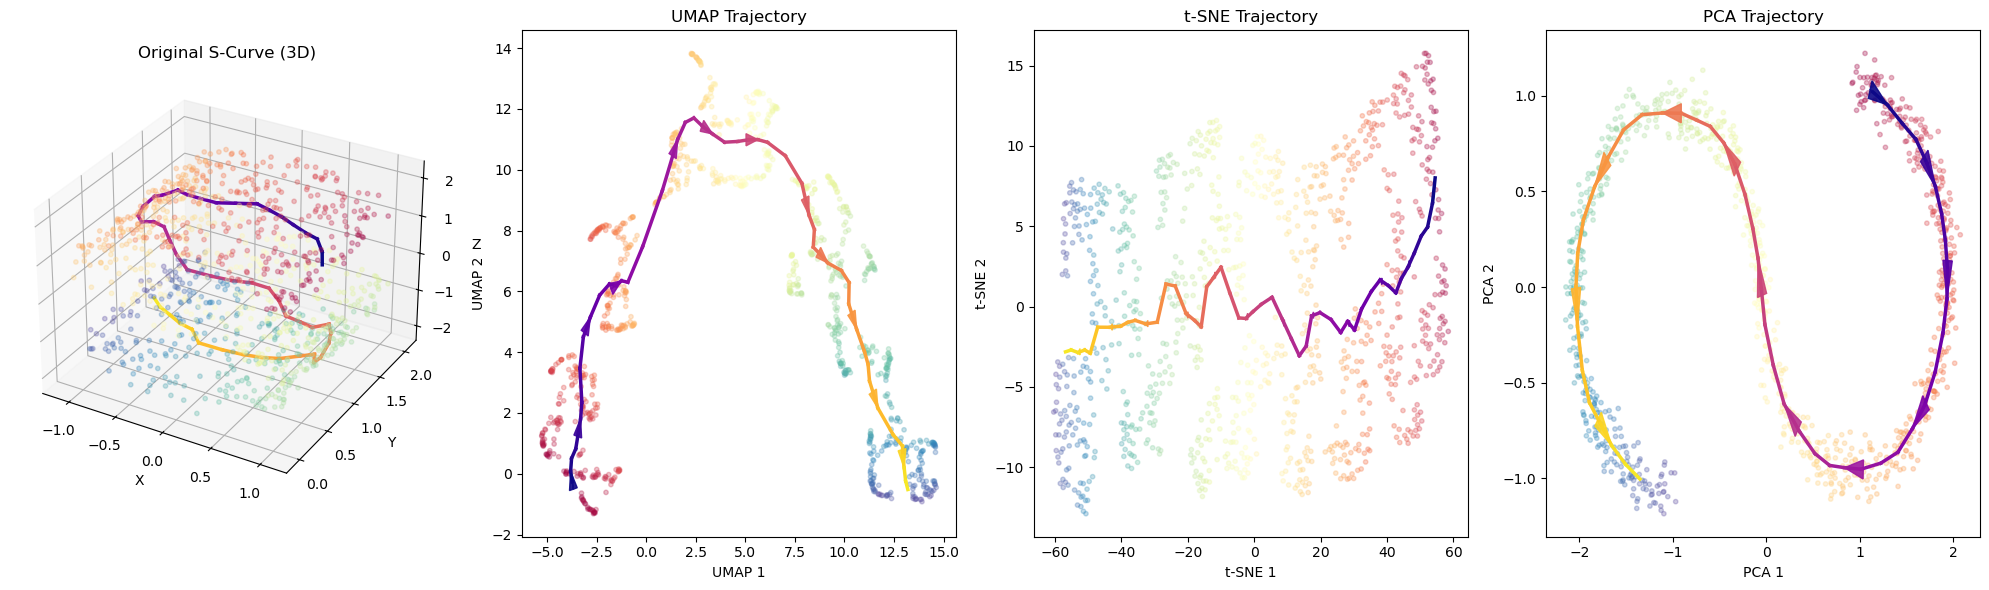

In [17]:
# generate S-curve data
X, t = make_s_curve(n_samples=1000, noise=0.05, random_state=42)

# dimensionality reduction
embedding_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X)
embedding_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
embedding_pca = PCA(n_components=2).fit_transform(X)

# compute smoothed trajectory using sliding window after sorting by t
sorted_indices = np.argsort(t)
sorted_X = X[sorted_indices]
sorted_umap = embedding_umap[sorted_indices]
sorted_tsne = embedding_tsne[sorted_indices]
sorted_pca = embedding_pca[sorted_indices]
stride = 20
window = 50

def get_trajectory(sorted_data):
    return np.array([
        np.mean(sorted_data[i:i+window], axis=0)
        for i in range(0, len(sorted_data) - window, stride)
    ])

path3d = get_trajectory(sorted_X)
path_umap = get_trajectory(sorted_umap)
path_tsne = get_trajectory(sorted_tsne)
path_pca = get_trajectory(sorted_pca)

# plot
fig = plt.figure(figsize=(20, 6))

# 1:original 3D S-curve with trajectory and arrows
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='Spectral', s=10, alpha=0.3)
for i in range(len(path3d) - 1):
    ax.plot([path3d[i, 0], path3d[i+1, 0]],
            [path3d[i, 1], path3d[i+1, 1]],
            [path3d[i, 2], path3d[i+1, 2]],
            color=plt.cm.plasma(i / len(path3d)), linewidth=2.5)
    if i % 4 == 0:
        ax.quiver(*path3d[i],
                  *(path3d[i+1] - path3d[i]),
                  color=plt.cm.plasma(i / len(path3d)),
                  arrow_length_ratio=0.15, alpha=0.9)
ax.set_title("Original S-Curve (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 2:UMAP
ax = fig.add_subplot(1, 4, 2)
ax.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=t, cmap='Spectral', s=10, alpha=0.3)
for i in range(len(path_umap) - 1):
    ax.plot([path_umap[i, 0], path_umap[i+1, 0]],
            [path_umap[i, 1], path_umap[i+1, 1]],
            color=plt.cm.plasma(i / len(path_umap)), linewidth=2.5)
    if i % 4 == 0:
        ax.arrow(*path_umap[i],
                 *(path_umap[i+1] - path_umap[i]),
                 color=plt.cm.plasma(i / len(path_umap)),
                 head_width=0.4, head_length=0.6, alpha=0.9, length_includes_head=True)
ax.set_title("UMAP Trajectory")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

# 3:t-SNE
ax = fig.add_subplot(1, 4, 3)
ax.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=t, cmap='Spectral', s=10, alpha=0.3)
for i in range(len(path_tsne) - 1):
    ax.plot([path_tsne[i, 0], path_tsne[i+1, 0]],
            [path_tsne[i, 1], path_tsne[i+1, 1]],
            color=plt.cm.plasma(i / len(path_tsne)), linewidth=2.5)
    if i % 4 == 0:
        ax.arrow(*path_tsne[i],
                 *(path_tsne[i+1] - path_tsne[i]),
                 color=plt.cm.plasma(i / len(path_tsne)),
                 head_width=0.4, head_length=0.6, alpha=0.9, length_includes_head=True)
ax.set_title("t-SNE Trajectory")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")

# 4:PCA
ax = fig.add_subplot(1, 4, 4)
ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=t, cmap='Spectral', s=10, alpha=0.3)
for i in range(len(path_pca) - 1):
    ax.plot([path_pca[i, 0], path_pca[i+1, 0]],
            [path_pca[i, 1], path_pca[i+1, 1]],
            color=plt.cm.plasma(i / len(path_pca)), linewidth=2.5)
    if i % 4 == 0:
        ax.arrow(*path_pca[i],
                 *(path_pca[i+1] - path_pca[i]),
                 color=plt.cm.plasma(i / len(path_pca)),
                 head_width=0.1, head_length=0.2, alpha=0.9, length_includes_head=True)
ax.set_title("PCA Trajectory")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

# UMAP, T-sne, PCA with only trajectory

/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/liumeicheng/opt/anaconda3/envs/symptom-umap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


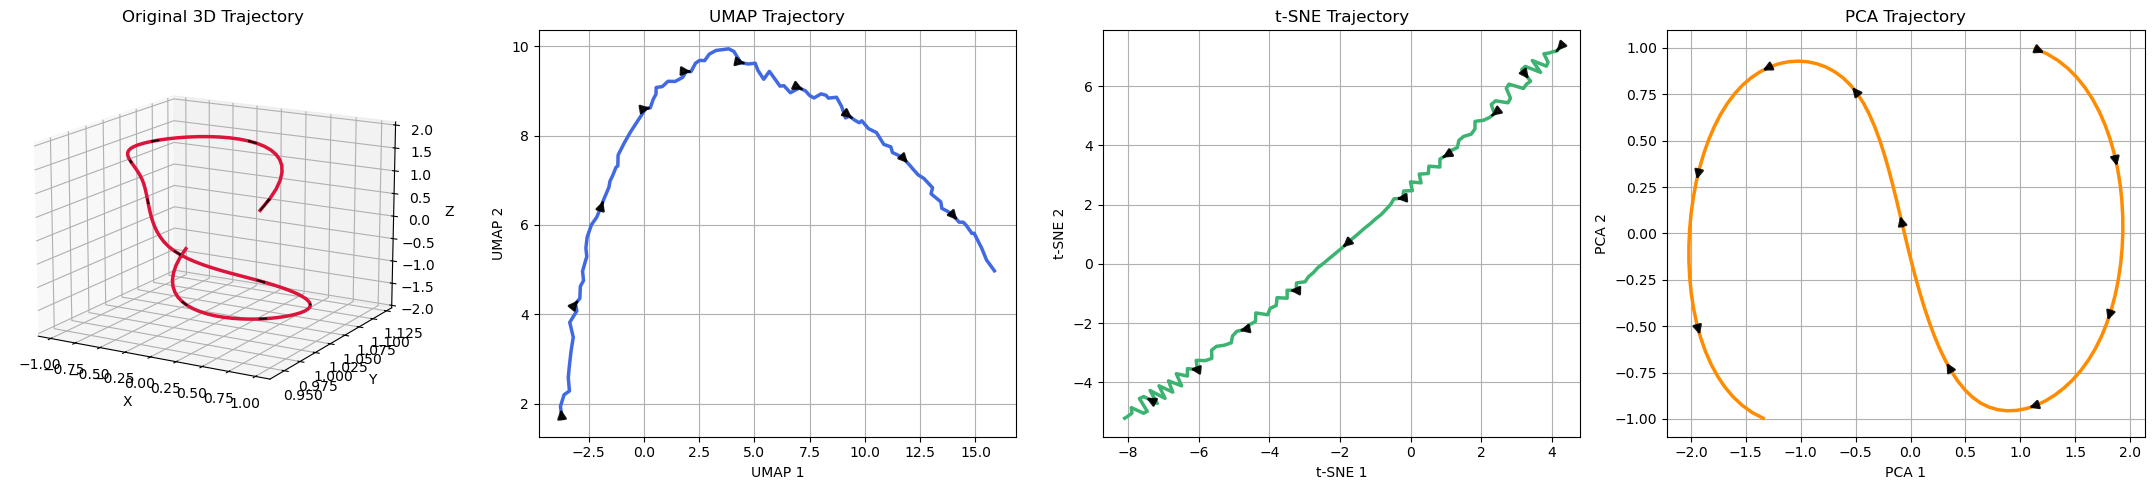

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.interpolate import splprep, splev

# generate original 3D S-curve data
X, t = make_s_curve(n_samples=1000, noise=0.02, random_state=42)
sorted_idx = np.argsort(t)
sorted_X = X[sorted_idx]

# dmoothing trajectory using moving average and B-spline interpolation
def moving_average(data, window=60, stride=10):
    return np.array([np.mean(data[i:i+window], axis=0)
                     for i in range(0, len(data) - window, stride)])

def interpolate_path(path, n_points=100, s=0.4):
    tck, u = splprep(path.T, s=s)
    u_new = np.linspace(u.min(), u.max(), n_points)
    return np.column_stack(splev(u_new, tck))

raw_path3d = moving_average(sorted_X)
path3d = interpolate_path(raw_path3d)

# dimensionality reduction
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.3, random_state=42)
umap_2d = umap_model.fit(X).transform(path3d)

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(path3d)
pca_2d = PCA(n_components=2).fit(X).transform(path3d)

# plot
fig = plt.figure(figsize=(22, 5))

# original S-curve trajectory
ax0 = fig.add_subplot(1, 4, 1, projection='3d')
ax0.plot(path3d[:, 0], path3d[:, 1], path3d[:, 2], color='crimson', linewidth=2.5)
for i in range(0, len(path3d) - 1, 10):
    vec = path3d[i + 1] - path3d[i]
    ax0.quiver(*path3d[i], *vec, color='black', arrow_length_ratio=0.2, alpha=0.8)
ax0.set_title("Original 3D Trajectory")
ax0.set_xlabel("X")
ax0.set_ylabel("Y")
ax0.set_zlabel("Z")
ax0.view_init(elev=15, azim=-60)

# UMAP, t-SNE, PCA
methods = {
    'UMAP': umap_2d,
    't-SNE': tsne_2d,
    'PCA': pca_2d
}
colors = ['royalblue', 'mediumseagreen', 'darkorange']

for ax, (title, coords), color in zip([fig.add_subplot(1, 4, i) for i in range(2, 5)], methods.items(), colors):
    ax.plot(coords[:, 0], coords[:, 1], color=color, linewidth=2.5)
    for i in range(0, len(coords) - 1, 10):
        start = coords[i]
        end = coords[i + 1]
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(arrowstyle='-|>',color='black',lw=1.8,mutation_scale=13,alpha=0.9))
    ax.set_title(f"{title} Trajectory")
    ax.set_xlabel(f"{title} 1")
    ax.set_ylabel(f"{title} 2")
    ax.grid(True)

plt.tight_layout()
plt.show()


# Projection

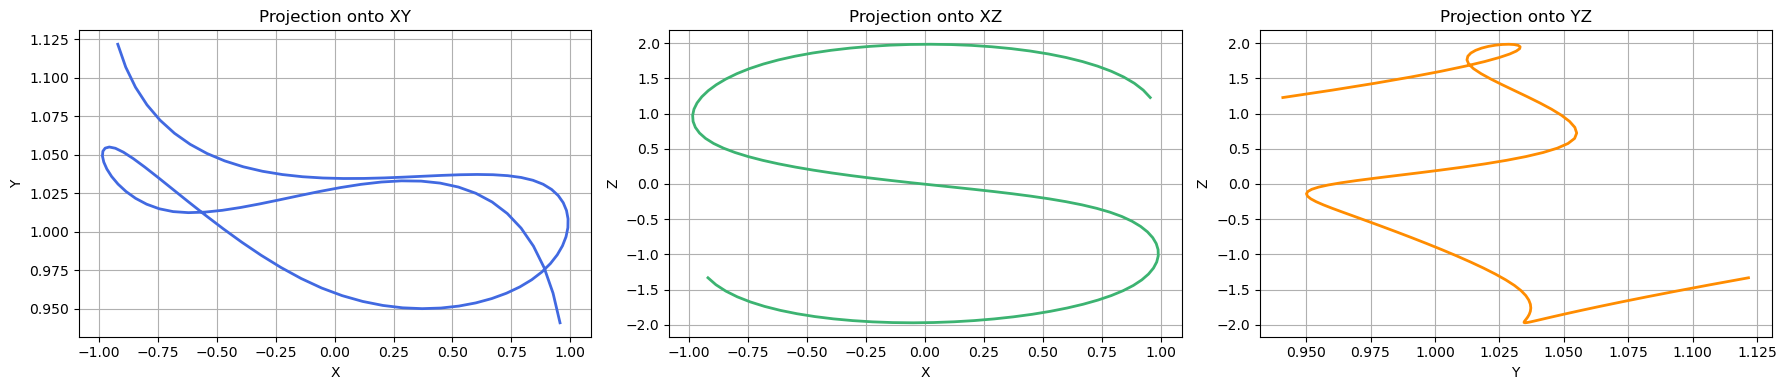

In [20]:
# generate and sort original 3D S-curve data
X, t = make_s_curve(n_samples=1000, noise=0.02, random_state=42)
sorted_idx = np.argsort(t)
sorted_X = X[sorted_idx]

# smooth trajectory using moving average and spline interpolation
def moving_average(data, window=60, stride=10):
    return np.array([np.mean(data[i:i+window], axis=0)
                     for i in range(0, len(data) - window, stride)])

def interpolate_path(path, n_points=100, s=0.4):
    tck, u = splprep(path.T, s=s)
    u_new = np.linspace(u.min(), u.max(), n_points)
    return np.column_stack(splev(u_new, tck))

raw_path3d = moving_average(sorted_X)
path3d = interpolate_path(raw_path3d)

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
# projection onto XY
axs[0].plot(path3d[:, 0], path3d[:, 1], color='royalblue', linewidth=2)
axs[0].set_title("Projection onto XY")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].grid(True)

# projection onto XZ
axs[1].plot(path3d[:, 0], path3d[:, 2], color='mediumseagreen', linewidth=2)
axs[1].set_title("Projection onto XZ")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Z")
axs[1].grid(True)

# projection onto YZ
axs[2].plot(path3d[:, 1], path3d[:, 2], color='darkorange', linewidth=2)
axs[2].set_title("Projection onto YZ")
axs[2].set_xlabel("Y")
axs[2].set_ylabel("Z")
axs[2].grid(True)

plt.tight_layout()
plt.show()